<a href="https://colab.research.google.com/github/Rafia-Shaikh-eng/A-Filter-based-Feature-Selection-Approach-in-Multilabel-Classification/blob/main/Network_Graphs_7_datasets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# if the scikit-multilearn not installed run this cell 
!pip install scikit-multilearn
# most of the datasets in Weka Arff format for this installed this library 
!pip install arff

     |████████████████████████████████| 92kB 3.1MB/s 
  Created wheel for arff: filename=arff-0.9-cp37-none-any.whl size=4970 sha256=61a5725bcf0b9276df34d35ce8c166759a38cf804dcd2af01299bab80965b439
  Stored in directory: /root/.cache/pip/wheels/04/d0/70/2c73afedd3ac25c6085b528742c69b9587cbdfa67e5194583b
Successfully built arff


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from skmultilearn.dataset import load_dataset

#Dataset

In [ ]:
#load dataset
X, y, feature_names, label_names = load_dataset('emotions', 'undivided')
#Train and test split
from skmultilearn.model_selection import iterative_train_test_split 
X1_train, y1_train,X1_test, y1_test= iterative_train_test_split(X, y, test_size = 0.2)

emotions:undivided - exists, not redownloading


In [ ]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True,
                                              include_self_edges=False)

#label_names=[i for i in range(nlabel)]
edge_map_ = graph_builder.transform(y1_train)
print("{} labels, {} edges".format(len(label_names), len(edge_map_)))

6 labels, 14 edges


In [ ]:
print("----------------------------\nemotions data set\n----------------------------")
print("{} labels, {} edges".format(len(label_names), len(edge_map_)))
print("\n----------------------------\nEdge map dictionary")
print("----------------------------\nLabels : No. of instances(weight)\n----------------------------")
edge_map_

----------------------------
emotions data set
----------------------------
6 labels, 14 edges

----------------------------
Edge map dictionary
----------------------------
Labels : No. of instances(weight)
----------------------------


{(0, 1): 45.0,
 (0, 2): 10.0,
 (0, 4): 8.0,
 (0, 5): 74.0,
 (1, 2): 73.0,
 (1, 3): 5.0,
 (1, 4): 1.0,
 (1, 5): 10.0,
 (2, 3): 83.0,
 (2, 4): 76.0,
 (2, 5): 6.0,
 (3, 4): 84.0,
 (3, 5): 2.0,
 (4, 5): 16.0}

In [ ]:
label_names

[('amazed-suprised', ['0', '1']),
 ('happy-pleased', ['0', '1']),
 ('relaxing-calm', ['0', '1']),
 ('quiet-still', ['0', '1']),
 ('sad-lonely', ['0', '1']),
 ('angry-aggresive', ['0', '1'])]

In [ ]:
from skmultilearn.cluster import NetworkXLabelGraphClusterer

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }
clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')

In [ ]:
partition = clusterer.fit_predict(X1_train,y1_train)
membership_vector = to_membership_vector(partition)
print('There are', len(partition),'clusters\n')
partition

There are 2 clusters



array([[0, 1, 5],
       [2, 3, 4]])

array([[2, 3, 4],
       [0, 1, 5]])

Text(0.5, 1.0, 'Label netwok graph of bibtex dataset')

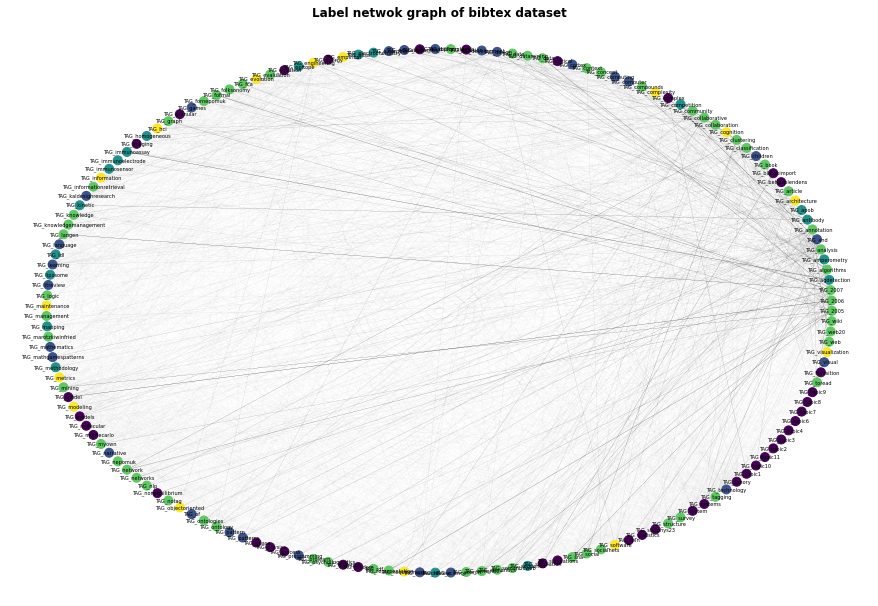

In [ ]:
import networkx as nx
names_dict = dict(enumerate(x[0].replace('-','-\n') for x in label_names))
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
nx.draw(
    clusterer.graph_,
    pos=nx.circular_layout(clusterer.graph_),
    labels=names_dict,
    with_labels = True,
    width = [10*x/y1_train.shape[0] for x in clusterer.weights_['weight']],
    node_color = [membership_vector[i] for i in range(y1_train.shape[1])],
    cmap=plt.cm.viridis,
    node_size=80,
    font_size=5,
    font_color='black',
  
)
plt.title('Label netwok graph of bibtex dataset', fontweight='bold')


#MediaMill dataset

In [ ]:
#load dataset
X2_train, y2_train, feature_names_2, label_names_2 = load_dataset('mediamill', 'train')
X2_test, y2_test, _, _ = load_dataset('mediamill', 'test')

mediamill:train - does not exists downloading
Downloaded mediamill-train
mediamill:test - does not exists downloading
Downloaded mediamill-test


In [ ]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True,
                                              include_self_edges=False)

#label_names=[i for i in range(nlabel)]
edge_map_2 = graph_builder.transform(y2_train)
print("{} labels, {} edges".format(len(label_names_2), len(edge_map_2)))

101 labels, 2118 edges


In [ ]:
from skmultilearn.cluster import NetworkXLabelGraphClusterer

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }
clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')

In [ ]:
partition = clusterer.fit_predict(X2_train,y2_train)
membership_vector = to_membership_vector(partition)
print('There are', len(partition),'clusters')

There are 3 clusters


Text(0.5, 1.0, 'Label netwok graph of MeidaMill dataset')

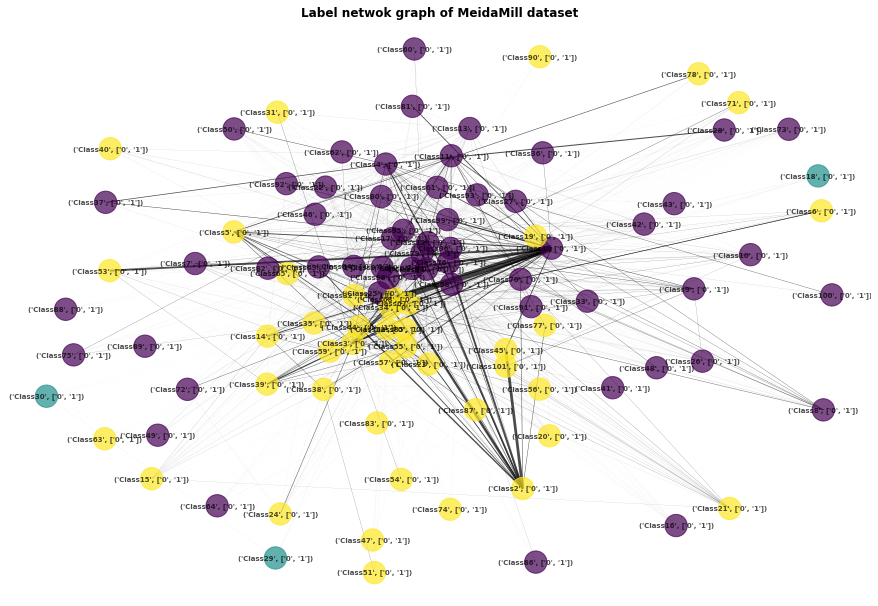

In [ ]:
import networkx as nx
names_dict = dict(enumerate(x for x in label_names_2))
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 8))
nx.draw(
    clusterer.graph_,
    pos=nx.spring_layout(clusterer.graph_,k=4),
    labels=names_dict,
    with_labels = True,
    width = [10*x/y2_train.shape[0] for x in clusterer.weights_['weight']],
    node_color = [membership_vector[i] for i in range(y2_train.shape[1])],
    cmap=plt.cm.viridis,
    node_size=500,
    font_size=7,
    font_color='black',
    alpha=0.7,
    font_weight='bold',
  
)
plt.title('Label netwok graph of MeidaMill dataset', fontweight='bold')
#plt.figure(figsize=(12, 10))

#Emotions dataset

In [ ]:
#load dataset
X3_train, y3_train, feature_names_3, label_names_3 = load_dataset('emotions', 'train')
X3_test, y3_test, _, _ = load_dataset('emotions', 'test')

emotions:train - does not exists downloading
Downloaded emotions-train
emotions:test - does not exists downloading
Downloaded emotions-test


In [ ]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True,
                                              include_self_edges=False)

#label_names=[i for i in range(nlabel)]
edge_map_3 = graph_builder.transform(y3_train)
print("{} labels, {} edges".format(len(label_names_3), len(edge_map_3)))

6 labels, 14 edges


In [ ]:
from skmultilearn.cluster import NetworkXLabelGraphClusterer

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }
clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')

In [ ]:
partition = clusterer.fit_predict(X3_train,y3_train)
membership_vector = to_membership_vector(partition)
print('There are', len(partition),'clusters')

There are 2 clusters


Text(0.5, 1.0, 'Label netwok graph of Emotions dataset')

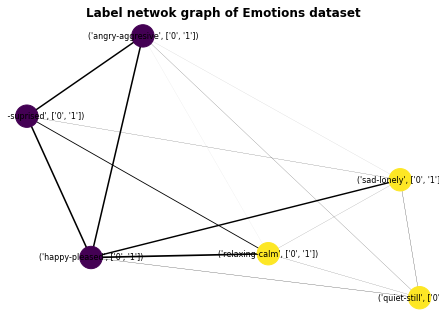

In [ ]:
import networkx as nx
names_dict = dict(enumerate(x for x in label_names_3))
import matplotlib.pyplot as plt
%matplotlib inline
#plt.figure(figsize=(12, 8))
nx.draw(
    clusterer.graph_,
    pos=nx.spring_layout(clusterer.graph_,k=4),
    labels=names_dict,
    with_labels = True,
    width = [10*x/y3_train.shape[0] for x in clusterer.weights_['weight']],
    node_color = [membership_vector[i] for i in range(y3_train.shape[1])],
    cmap=plt.cm.viridis,
    node_size=500,
    font_size=8,
    font_color='black',
    #alpha=0.7,
    #font_weight='bold',
  
)
plt.title('Label netwok graph of Emotions dataset', fontweight='bold')
#plt.figure(figsize=(12, 10))

#Scene dataset

In [ ]:
#load dataset
X4_train, y4_train, feature_names_4, label_names_4 = load_dataset('scene', 'train')
X4_test, y4_test, _, _ = load_dataset('scene', 'test')

scene:train - does not exists downloading
Downloaded scene-train
scene:test - does not exists downloading
Downloaded scene-test


In [ ]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True,
                                              include_self_edges=False)

#label_names=[i for i in range(nlabel)]
edge_map_4 = graph_builder.transform(y4_train)
print("{} labels, {} edges".format(len(label_names_4), len(edge_map_4)))

6 labels, 7 edges


In [ ]:
from skmultilearn.cluster import NetworkXLabelGraphClusterer

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }
clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')

In [ ]:
partition = clusterer.fit_predict(X4_train,y4_train)
membership_vector = to_membership_vector(partition)
print('There are', len(partition),'clusters')

There are 2 clusters


Text(0.5, 1.0, 'Label netwok graph of Scene dataset')

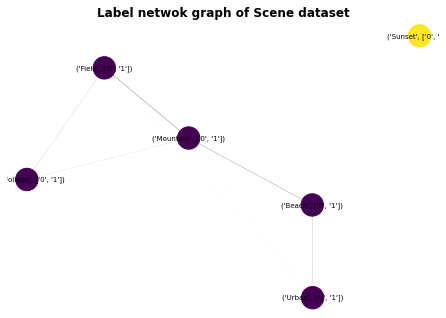

In [ ]:
import networkx as nx
names_dict = dict(enumerate(x for x in label_names_4))
import matplotlib.pyplot as plt
%matplotlib inline
#plt.figure(figsize=(12, 8))
nx.draw(
    clusterer.graph_,
    pos=nx.spring_layout(clusterer.graph_,k=4),
    labels=names_dict,
    with_labels = True,
    width = [10*x/y4_train.shape[0] for x in clusterer.weights_['weight']],
    node_color = [membership_vector[i] for i in range(y4_train.shape[1])],
    cmap=plt.cm.viridis,
    node_size=500,
    font_size=7,
    font_color='black',
    #alpha=0.7,
    #font_weight='bold',
  
)
plt.title('Label netwok graph of Scene dataset', fontweight='bold')


#Genbase dataset

In [ ]:
#load dataset
X5_train, y5_train, feature_names_5, label_names_5 = load_dataset('genbase', 'train')
X5_test, y5_test, _, _ = load_dataset('genbase', 'test')

genbase:train - does not exists downloading
Downloaded genbase-train
genbase:test - does not exists downloading
Downloaded genbase-test


In [ ]:
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
graph_builder = LabelCooccurrenceGraphBuilder(weighted=True,
                                              include_self_edges=False)

#label_names=[i for i in range(nlabel)]
edge_map_5 = graph_builder.transform(y5_train)
print("{} labels, {} edges".format(len(label_names_5), len(edge_map_5)))

27 labels, 32 edges


In [ ]:
from skmultilearn.cluster import NetworkXLabelGraphClusterer

# we define a helper function for visualization purposes
def to_membership_vector(partition):
    return {
        member :  partition_id
        for partition_id, members in enumerate(partition)
        for member in members
    }
clusterer = NetworkXLabelGraphClusterer(graph_builder, method='louvain')

In [ ]:
partition = clusterer.fit_predict(X5_train,y5_train)
membership_vector = to_membership_vector(partition)
print('There are', len(partition),'clusters')

There are 11 clusters


Text(0.5, 1.0, 'Label netwok graph of Genbase dataset')

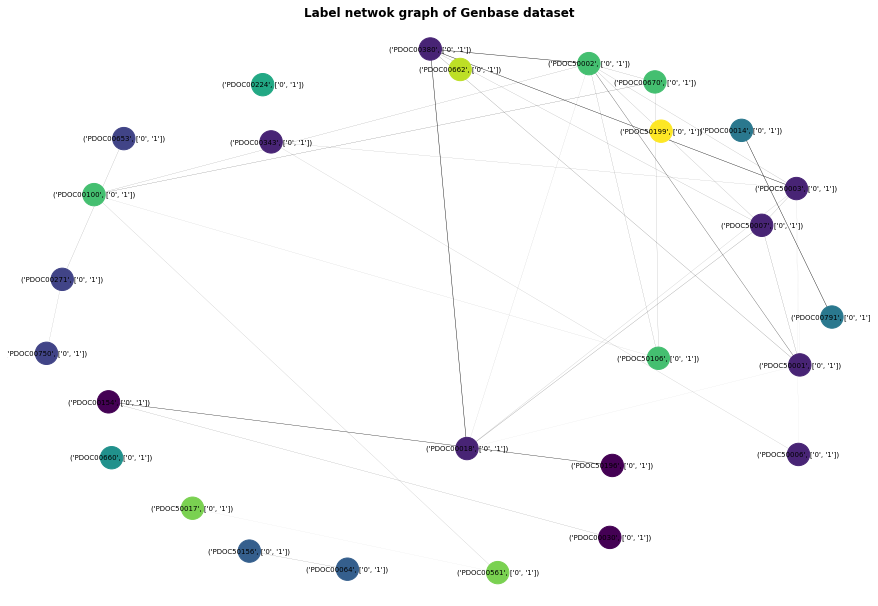

In [ ]:
import networkx as nx
names_dict = dict(enumerate(x for x in label_names_5))
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 8))
nx.draw(
    clusterer.graph_,
    pos=nx.spring_layout(clusterer.graph_,k=4),
    labels=names_dict,
    with_labels = True,
    width = [10*x/y5_train.shape[0] for x in clusterer.weights_['weight']],
    node_color = [membership_vector[i] for i in range(y5_train.shape[1])],
    cmap=plt.cm.viridis,
    node_size=500,
    font_size=7,
    font_color='black',
    #alpha=0.7,
    #font_weight='bold'
  
)
plt.title('Label netwok graph of Genbase dataset', fontweight='bold')
#plt.figure(figsize=(12, 10))